# 1. Install and import all necessary libraries in your Jupyter notebook.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

# 2. Import your data and conduct any necessary cleaning, manipulations, and reprocessing (such as renaming).

In [4]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [5]:
path = r"C:\Users\andyc\Job Salary Analysis"

In [6]:
# Import the salary data
salary = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'salary.csv'), index_col = False)

In [7]:
salary.head()

,Unnamed: 0,ID,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,United Kingdom,White
1,1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,United States of America,Hispanic
2,2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,United States of America,Hispanic
4,4,4,52.0,Male,Master's,Director,20.0,200000.0,United States of America,Asian


In [8]:
salary.shape

(6702, 10)

# 3. Use the elbow technique as shown in the Jupyter notebook for this Exercise.

In [10]:
#creating a subset dataframe that only icnludes numeric columns

salary2 = salary[['Age', 'Years of Experience', 'Salary']]

In [11]:
# Defines the range of potential clusters in the data.

num_cl = range(1, 10)

# Defines k-means clusters in the range assigned above.

kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [12]:
# Creates a score that represents a rate of variation for the given cluster option.
score = [kmeans[i].fit(salary2).score(salary2) for i in range(len(kmeans))] 

score

[-18671577893260.875,
 -4755848908744.782,
 -2075122391281.8442,
 -1328750587066.2283,
 -849607046055.7168,
 -624091109013.5626,
 -471207609021.19574,
 -333780113073.3678,
 -257253588605.22586]

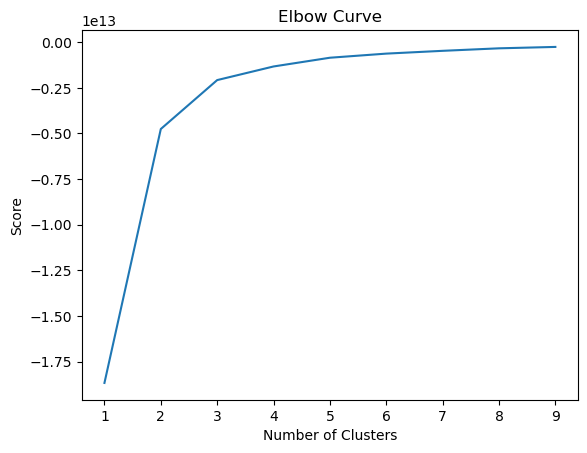

In [13]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

# 4. Make an informed decision about the number of clusters you’ll use in your k-means algorithm based on the chart.

In this graph, there is a large jump from two to three on the x-axis, but after that, the curve straightens out. This means that the optimal count for your clusters is three.

# 5. Run the k-means algorithm.

In [17]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [18]:
# Fit the k-means object to the data.

kmeans.fit(salary2)

KMeans(n_clusters=3)

# 6. Attach a new column to your dataframe with the resulting clusters.

In [20]:
#attaching the new column into the salary2 dataframe with the resulting clusters.
salary2['clusters'] = kmeans.fit_predict(salary2)

C:\Users\andyc\AppData\Local\Temp\ipykernel_2112\906620498.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary2['clusters'] = kmeans.fit_predict(salary2)


In [21]:
salary2.head()

,Age,Years of Experience,Salary,clusters
0,32.0,5.0,90000.0,2
1,28.0,3.0,65000.0,0
2,45.0,15.0,150000.0,1
3,36.0,7.0,60000.0,0
4,52.0,20.0,200000.0,1


In [22]:
#applying the value counts function to the clusters column

salary2['clusters'].value_counts()

clusters
0    2368
2    2188
1    2146
Name: count, dtype: int64

# 7. Create a few different visualizations (e.g., scatterplots) using your clustered data.

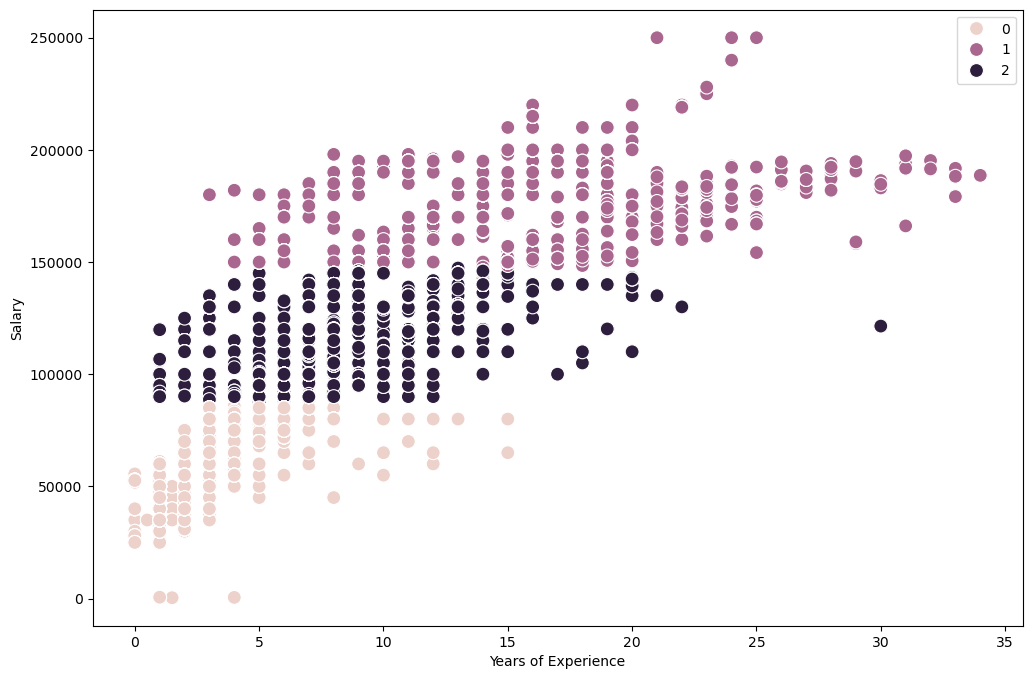

In [24]:
# Plot the clusters for the "Years of Experience" and "Salary" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=salary2['Years of Experience'], y=salary2['Salary'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Years of Experience') # Label x-axis.
plt.ylabel('Salary') # Label y-axis.
plt.show()

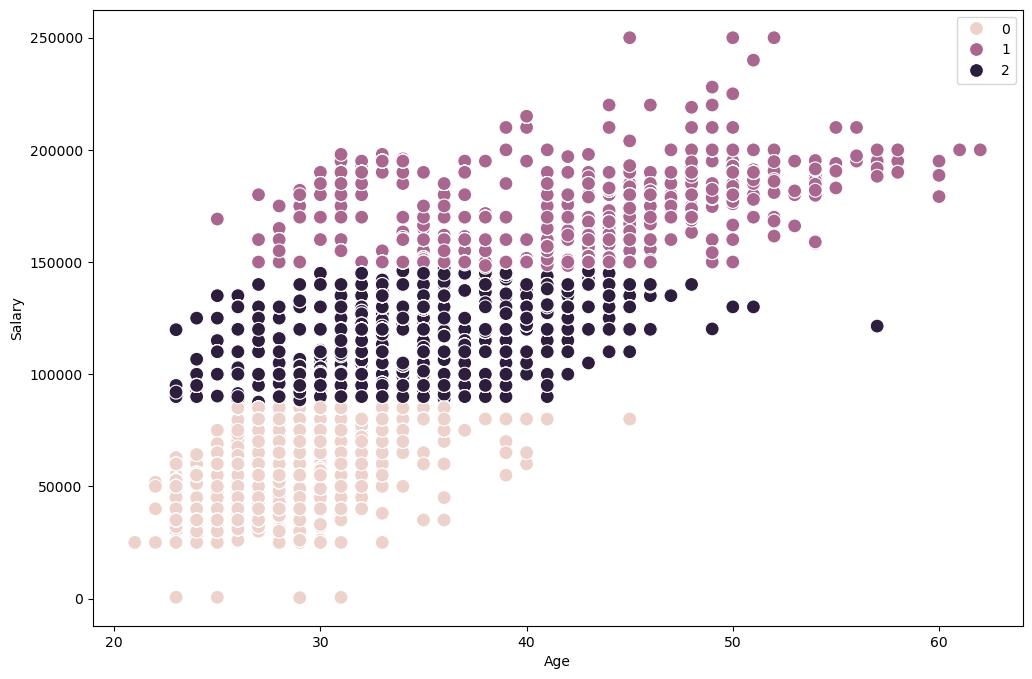

In [25]:
# Plot the clusters for the "Age" and "Salary" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=salary2['Age'], y=salary2['Salary'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Age') 
plt.ylabel('Salary') 
plt.show()

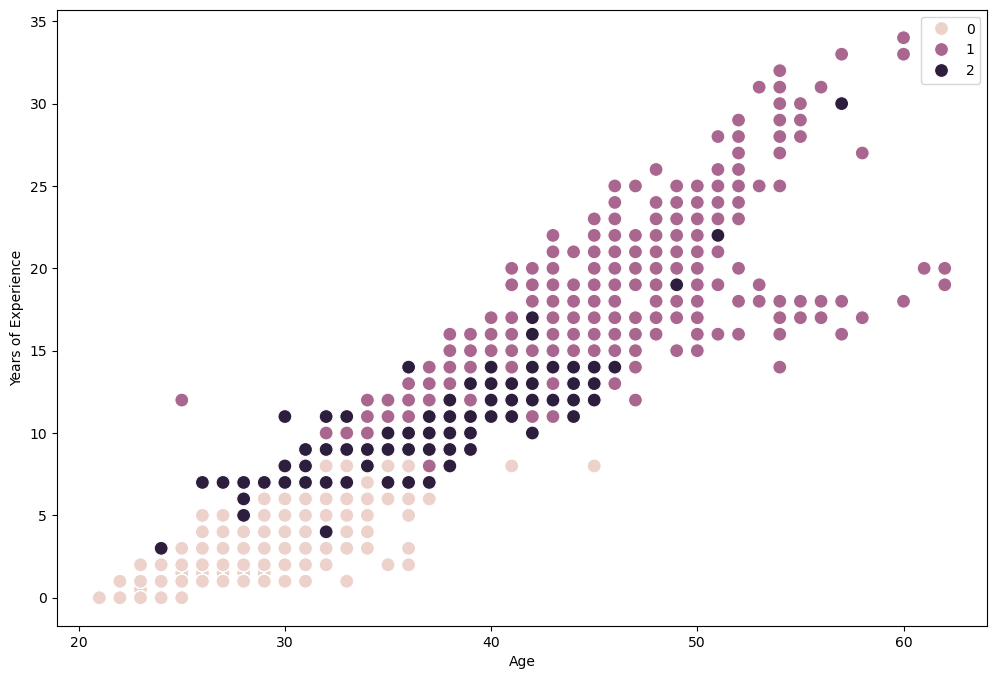

In [26]:
# Plot the clusters for the "Age" and "Years of Experience" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=salary2['Age'], y=salary2['Years of Experience'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Age') 
plt.ylabel('Years of Experience') 
plt.show()

# 8. Discuss how and why the clusters make sense.

The three clusters make sense because they highlight each portion of the visualizations differentiating each tier. For example in the first visualization, the pink cluster represents the individuals with the lowest years of experience and the lowest salaries. The purple cluster represent the indivudals with the most years of experience with higher salaries. Lastly, the dark purple cluster represents those in between.

In the first visualization, a clear trend emerges where salary tends to rise with an increase in years of experience. Similarly, the second visualization highlights a comparable pattern, showing that as age increases, salary also generally increases. This relationship is further supported by the third visualization, which demonstrates that age is closely linked to years of experience. As individuals age, they typically accumulate more experience, which in turn drives salary growth. We can conclude that the increase in salary is a result of both age and years of experience, with these factors being strongly interconnected.

# 9. Calculate the descriptive statistics for your clusters using the groupby() function and discuss your findings.

In [30]:
#grouping clusters

salary2.loc[salary2['clusters'] == 2, 'cluster'] = 'dark purple'
salary2.loc[salary2['clusters'] == 1, 'cluster'] = 'purple'
salary2.loc[salary2['clusters'] == 0, 'cluster'] = 'pink'

C:\Users\andyc\AppData\Local\Temp\ipykernel_2112\1212340111.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary2.loc[salary2['clusters'] == 2, 'cluster'] = 'dark purple'


In [31]:
# applying descriptive statistics to the newly created clusters using the groupby() function.

salary2.groupby('cluster').agg({'Age':['mean', 'median'], 
                         'Years of Experience':['mean', 'median'], 
                         'Salary':['mean', 'median']})

Age        Years of Experience                Salary  \
                  mean median                mean median           mean   
cluster                                                                   
dark purple  33.188757   33.0            7.800274    8.0  117234.657678   
pink         27.779561   27.0            2.861698    3.0   56647.586993   
purple       40.506990   41.0           14.168686   14.0  178144.184529   

                       
               median  
cluster                
dark purple  120000.0  
pink          57000.0  
purple       180000.0

# 10. Propose what these results could be useful for in future steps of an analytics pipeline.

 - The purple cluster has the highest mean and median for Age. This makes sense as the mean and median is the highest for years of experience as well. this results in salary having the highest mean and median. With older age, comes more years of experience and with more years of experiences comes higher salaries.

 - The pink cluster has the lowest mean and median for Age. This makes sense as the mean and median is the lowest for years of experience. which results in salary having the lowest mean and median. Young individuals have less time to gather years of experience which results in lower salary.

These results can be used for predicting and forecasting salaries of individuals based off their age and years of experience. They can be useed by organizations to figure out compensations for indiviudals when hiring.